# Social Media Sentiment Analysis 

# Problem Statement
#### Dataset containing several tweets with positive and negative sentiment associated with it
- Cyber bullying and hate speech has been a menace for quite a long time,So our objective for this task is to detect speeches tweets associated with negative sentiments.From this dataset we classify a tweet as hate speech if it has racist or sexist tweets associated with it.

- So our task here is to classify racist and sexist tweets from other tweets and filter them out.

# Dataset Description

- The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text.Each line of the file is a data record. Each record consists of one or more fields, separated by commas. 
- Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist,our objective is to predict the labels on the given test dataset.

# Attribute Information

- id : The id associated with the tweets in the given dataset
- tweets : The tweets collected from various sources and having either postive or negative sentiments associated with it
- label : A tweet with label '0' is of positive sentiment while a tweet with label '1' is of negative sentiment

## Importing the necessary packages 

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Train dataset used for our analysis

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train_original = train.copy()

In [4]:
train.shape

(31962, 3)

## Test dataset used for our analysis

In [5]:
test = pd.read_csv('test.csv')

In [6]:
test_original = test.copy()

In [7]:
test.shape

(17197, 2)

### We combine Train and Test datasets for pre-processing stage

In [8]:
combine = pd.concat([train, test], ignore_index=True, sort=True)

In [9]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [10]:
combine["label"].value_counts()

label
0.0    29720
1.0     2242
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

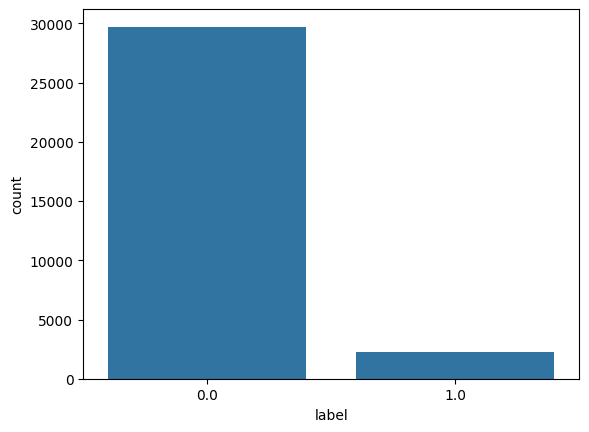

In [11]:
sns.countplot(x="label", data=combine)

This is an imbalanced data set

# Data Pre-Processing

##  Removing Twitter Handles (@user)

In [12]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
        

In [13]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Removing Punctuations, Numbers, and Special Characters

In [14]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

In [15]:
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Removing Stop/Short Words


In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AAYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords.words('english')]))
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if w in x.split() if len(w)>3]))
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w if w.startswith('#') else ''.join(char for char in w if char.isalpha()) for w in x.split()]))
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join(word for word in x.split() if 'ð' not in word))

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cant cause offer wheelchai...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


 ## Tokenization

In [18]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cant, cause, offer, wh...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

## Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

In [19]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, cant, caus, offer, whee...
2                                    [bihday, majesti]
3                           [#model, love, take, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

#### Now let’s stitch these tokens back together.

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cant caus offer wheelchair ...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Visualization from Tweets


## WordCloud

In [22]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image

 #### Store all the words from the dataset which are positive

In [23]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

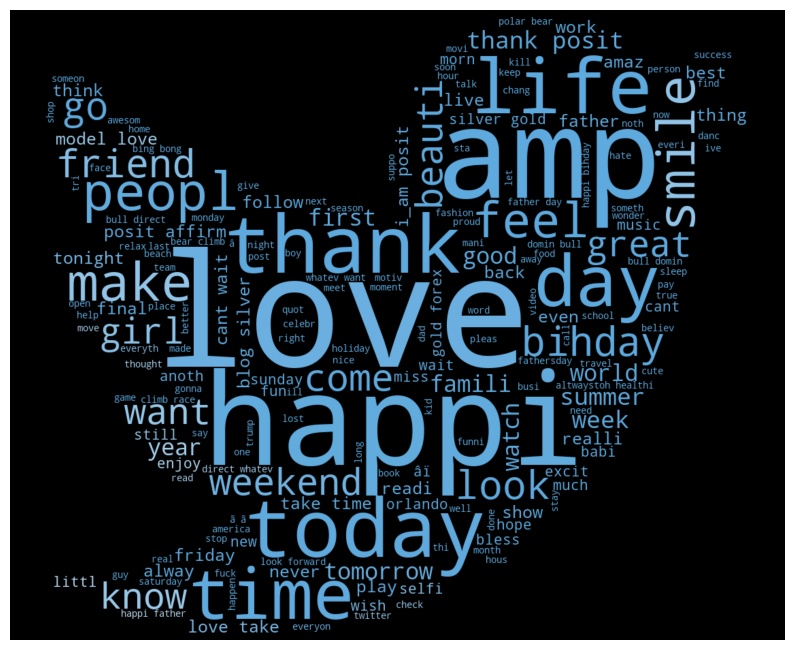

In [24]:
# combining the image with the dataset
Mask = np.array(Image.open('Twitter-PNG-Image.png'))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

#### Store all the words from the dataset which are negative

In [25]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

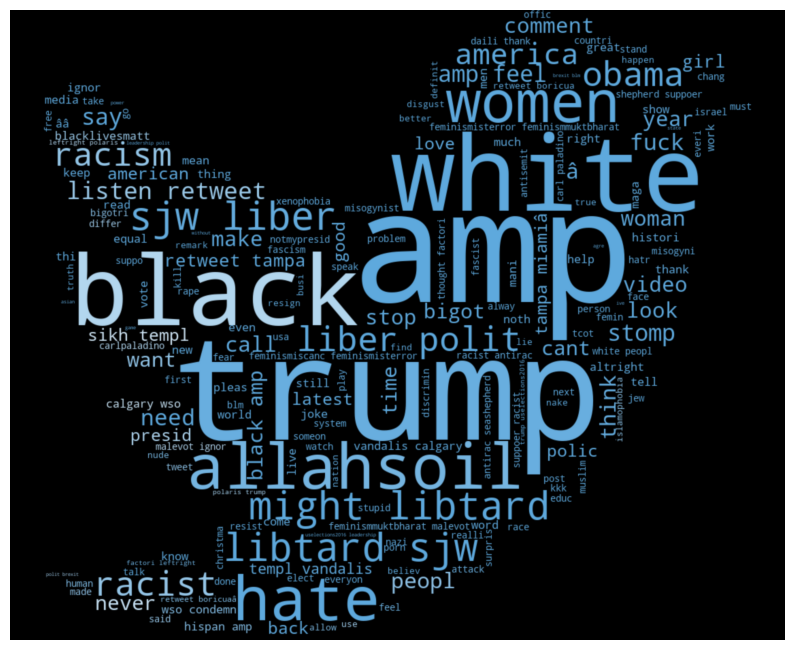

In [26]:
# combining the image with the dataset
Mask = np.array(Image.open('Twitter-PNG-Image.png'))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

# Understanding the impact of Hashtags on tweets sentiment

In [27]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

#### A nested list of all the hashtags from the positive reviews from the dataset

In [28]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

#### Flatten the nested list ht_positive into a single list containing all elements from the sublists

In [29]:
ht_positive_unnest = sum(ht_positive,[])

#### A nested list of all the hashtags from the negative reviews from the dataset

In [30]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [31]:
ht_negative_unnest = sum(ht_negative,[])

## Plotting BarPlots

### For Positive Tweets in the dataset

#### Counting the frequency of the words having Positive Sentiment 

In [32]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1564, 'posit': 904, 'smile': 633, 'healthi': 557, 'thank': 501, 'fun': 432, 'affirm': 422, 'life': 398, 'model': 374, 'summer': 359, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [33]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [34]:
df_positive.head()

,Hashtags,Count
0,run,69
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


In [35]:
df_positive_plot = df_positive.nlargest(20,columns='Count') 

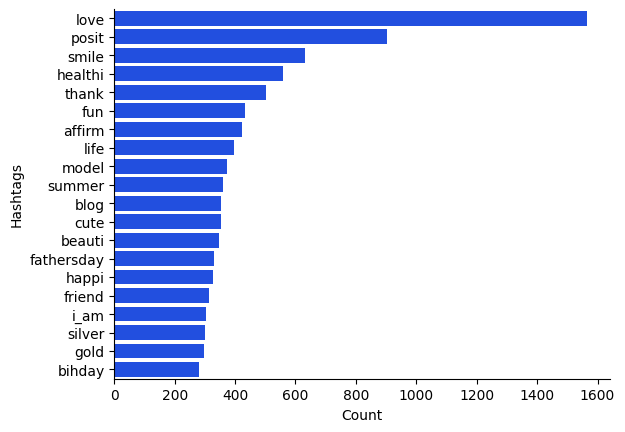

In [36]:
sns.set_palette("bright")
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

### For Negative Tweets in the dataset

#### Counting the frequency of the words having Negative Sentiment 

In [37]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [38]:
word_freq_negative

FreqDist({'trump': 131, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 35, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [39]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [40]:
df_negative.head(10)

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,6
9,xenophobia,12


In [41]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

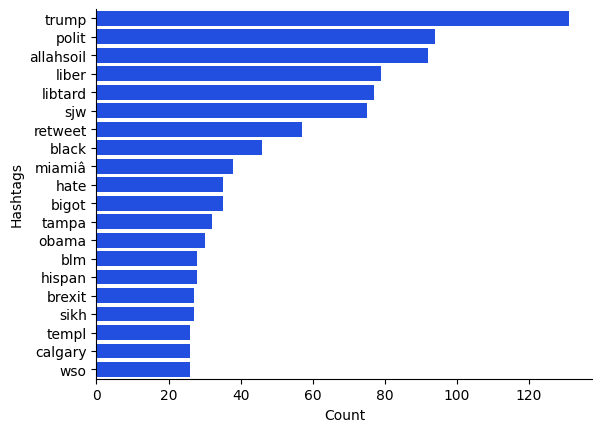

In [42]:
sns.set_palette("bright")
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# Extracting Features from cleaned Tweets

In [43]:
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cant caus offer wheelchair ...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


### TF-IDF Features

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000)

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
combine["label"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49154    NaN
49155    NaN
49156    NaN
49157    NaN
49158    NaN
Name: label, Length: 49159, dtype: float64

# Applying Machine Learning Models

In [46]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into training and validation set

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_valid,y_train,y_valid = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3)


## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
Log_Reg = LogisticRegression()

In [51]:
from sklearn.metrics import f1_score

In [52]:
Log_Reg.fit(x_train,y_train)

LogisticRegression()

In [53]:
prediction_tfidf = Log_Reg.predict_proba(x_valid)

prediction_tfidf

array([[0.96787638, 0.03212362],
       [0.96846255, 0.03153745],
       [0.32995453, 0.67004547],
       ...,
       [0.97239852, 0.02760148],
       [0.96290869, 0.03709131],
       [0.9788631 , 0.0211369 ]])

#### Calculating the F1 score

In [54]:
prediction_int = prediction_tfidf[:,1]>=0.3

# calculating f1 score
log_tfidf = f1_score(y_valid, prediction_int)

log_tfidf

0.5522648083623694

## XGBoost

In [55]:
from xgboost import XGBClassifier

In [56]:
model_bow = XGBClassifier()

In [57]:
model_tfidf=XGBClassifier()

In [58]:
model_tfidf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid)

xgb_tfidf

array([[0.98290807, 0.01709196],
       [0.98906153, 0.01093849],
       [0.05237776, 0.94762224],
       ...,
       [0.9851868 , 0.01481318],
       [0.9845766 , 0.01542341],
       [0.96649873, 0.03350125]], dtype=float32)

#### Calculating the F1 score

In [60]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_int_tfidf=xgb_tfidf[:,1]>=0.3

# calculating f1 score
xgb_score_tfidf = f1_score(y_valid,xgb_int_tfidf, average="binary")

xgb_score_tfidf

0.5642795513373597

## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dct = DecisionTreeClassifier()

In [63]:
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
dct_tfidf = dct.predict_proba(x_valid)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Calculating F1 Score

In [65]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_int_tfidf = dct_tfidf[:,1]>=0.3

# calculating f1 score
dct_score_tfidf=f1_score(y_valid,dct_int_tfidf, average="binary")

dct_score_tfidf

0.5287713841368584

## Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
rf_tfidf = rf.predict_proba(x_valid)

rf_tfidf

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Calculating F1 Score

In [70]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
rf_int_tfidf = rf_tfidf[:,1]>=0.3

# calculating f1 score
rf_score_tfidf=f1_score(y_valid,rf_int_tfidf, average="binary")

rf_score_tfidf

0.5872659176029963

# Model Comparison

In [71]:
Algo=['LogisticRegression','XGBoost','DecisionTree', 'RandomForest']

In [72]:
score = [log_tfidf,xgb_score_tfidf,dct_score_tfidf,rf_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,5)])

In [73]:
compare.sort_values(by="F1_Score", ascending=False)

,Model,F1_Score
4,RandomForest,0.587266
2,XGBoost,0.564280
1,LogisticRegression,0.552265
3,DecisionTree,0.528771


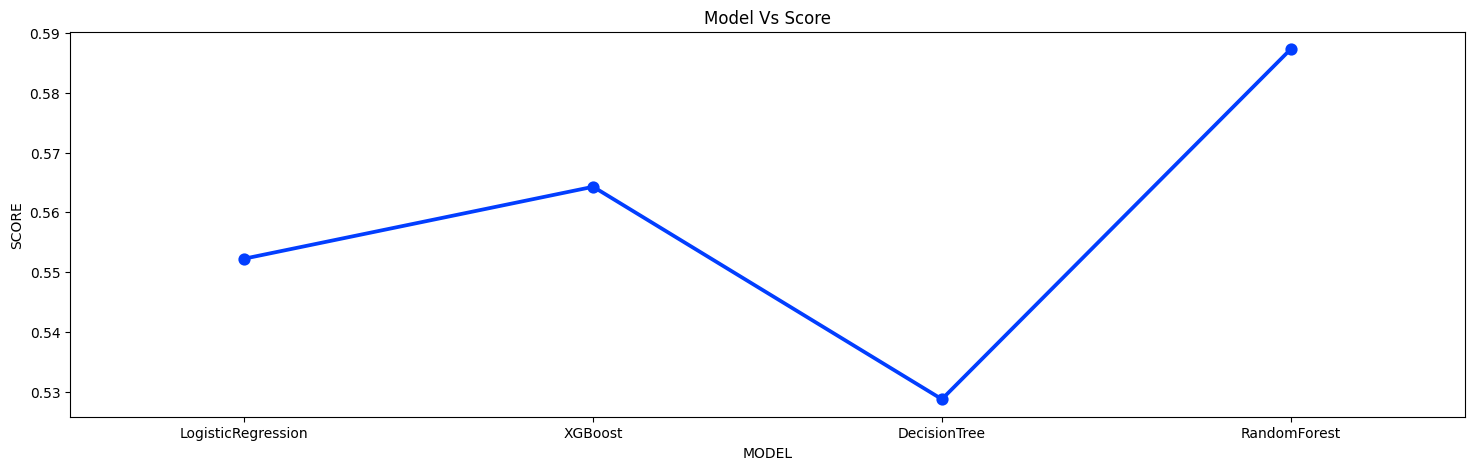

In [74]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

Random Forest performs relatively better than the other models. Therefore, hyperparameter tune the Random Forest model.

## Hyperparameter Tuning

In [75]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [76]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   ]

In [77]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\AAYUSH\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
87 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AAYUSH\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AAYUSH\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\AAYUSH\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    va

---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [78]:
rf = RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=None)

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=8, n_estimators=1000)

In [80]:
rf_tfidf = rf.predict_proba(x_valid)

rf_tfidf

array([[1.        , 0.        ],
       [0.989625  , 0.010375  ],
       [0.111     , 0.889     ],
       ...,
       [0.99695652, 0.00304348],
       [0.994     , 0.006     ],
       [1.        , 0.        ]])

In [81]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
rf_int_tfidf = rf_tfidf[:,1]>=0.3

# calculating f1 score
rf_score_tfidf=f1_score(y_valid,rf_int_tfidf, average="binary")

rf_score_tfidf

0.6035965598123534

## Using the best possible model to predict for the test data

#### From the above comaprison graph we can see that Random Forest trained using TF-IDF features gives us the best performance

In [82]:
test_tfidf = tfidf_matrix[31962:]

In [83]:
# Get predicted probabilities
test_pred = rf.predict_proba(test_tfidf)

# Thresholding for binary classification (positive class)
test_pred_int = test_pred[:, 1] >= 0.3  # Convert to boolean directly

# Add 'label' column to test DataFrame
test['label'] = test_pred_int.astype(int)  # Cast to integer (optional)

# Create submission DataFrame
submission = test[['id', 'label']]

# Save submission to CSV without index
submission.to_csv('result.csv', index=False)

### Test dataset after prediction

In [84]:
res = pd.read_csv('result.csv')

In [85]:
res

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
